In [208]:
from colorama import Fore, Back, Style
from random import choice
import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
import cv2
import argparse

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [180]:
def statement(stmnt):
    print(Fore.YELLOW, Back.LIGHTBLACK_EX, Style.BRIGHT, stmnt, Style.RESET_ALL)

#  Loading Data

In [181]:
mnist = tf.keras.datasets.mnist

In [182]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [183]:
df_train = read_csv('train.csv')
df_test = read_csv('test.csv')
df_test.shape,df_train.shape

((28000, 784), (42000, 785))

In [184]:
x = df_train.iloc[:,1:].values
y = df_train.iloc[:,0]

In [185]:
# y = tf.keras.utils.to_categorical(y)
# y.shape

In [186]:
x = x.reshape(x.shape[0],28,28,1)

In [187]:
x.shape

(42000, 28, 28, 1)

# Loading the data into training and testing samples

In [188]:
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

In [189]:
# ytrain = tf.keras.utils.to_categorical(ytrain)
# ytest = tf.keras.utils.to_categorical(ytest)

In [190]:
xtrain.shape

(60000, 28, 28)

In [191]:
xtest.shape

(10000, 28, 28)

# Crosschecking training and testing data with corresponding labels

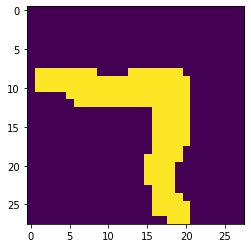

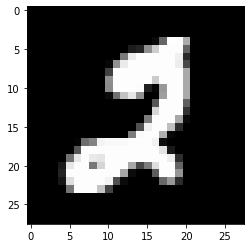

   Label Value At Index(16165) For Training Data = 5
    Label Value At Index(5099) For Testing Data = 2 


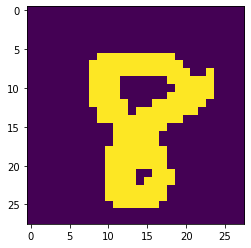

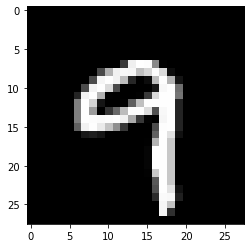

   Label Value At Index(22961) For Training Data = 9
    Label Value At Index(1622) For Testing Data = 9 


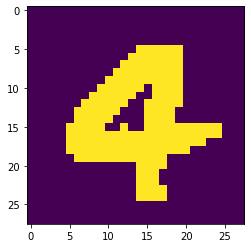

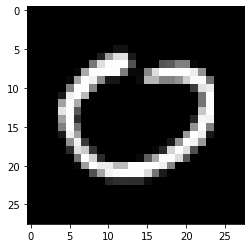

   Label Value At Index(12909) For Training Data = 1
    Label Value At Index(561) For Testing Data = 0 


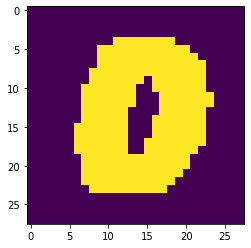

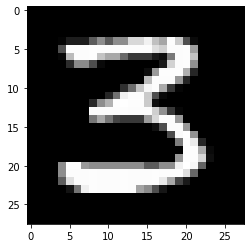

   Label Value At Index(21404) For Training Data = 6
    Label Value At Index(9604) For Testing Data = 3 


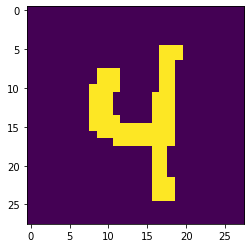

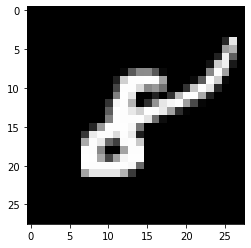

   Label Value At Index(22345) For Training Data = 1
    Label Value At Index(6765) For Testing Data = 8 


In [192]:
for j in range(5):
    i = choice(range(30000))
    plt.imshow(xtrain_[i])
    plt.show()
    try:
        k = i
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    except IndexError:
        k = choice(range(10000))
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    plt.show()
    stmnt = f'''label value at index({i}) for training data = {ytrain[i]}
    label value at index({k}) for testing data = {ytest[k]}'''.title()
    statement(stmnt)

# Normalizing the data

In [193]:
x = tf.keras.utils.normalize(x)
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

# Spliting data for validation

In [194]:
xtrain_, val_x, ytrain_, val_y = train_test_split(x,y,test_size=.2,random_state=42)

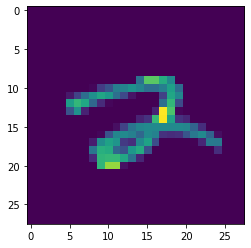

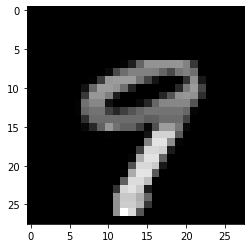

   Label Value At Index(42522) For Training Data = 2
    Label Value At Index(8841) For Testing Data = 9 


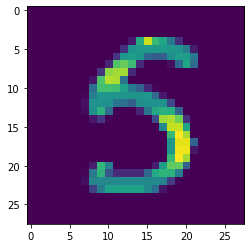

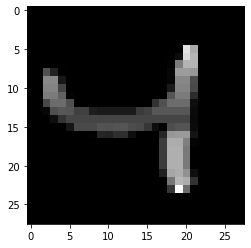

   Label Value At Index(15374) For Training Data = 5
    Label Value At Index(2338) For Testing Data = 4 


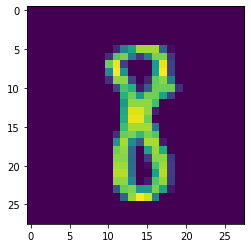

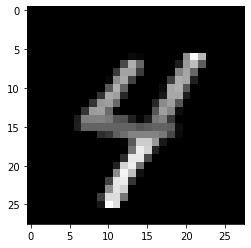

   Label Value At Index(55764) For Training Data = 8
    Label Value At Index(8917) For Testing Data = 4 


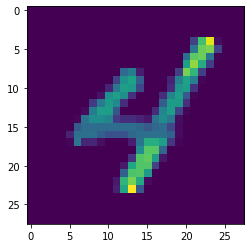

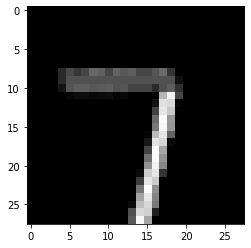

   Label Value At Index(59863) For Training Data = 4
    Label Value At Index(9328) For Testing Data = 7 


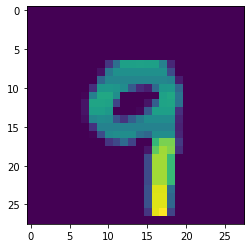

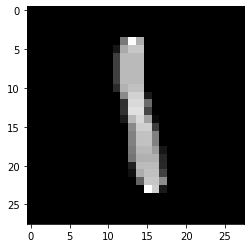

   Label Value At Index(37359) For Training Data = 9
    Label Value At Index(6060) For Testing Data = 1 


In [195]:
for j in range(5):
    i = choice(range(60000))
    plt.imshow(xtrain[i])
    plt.show()
    try:
        k = i
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    except IndexError:
        k = choice(range(10000))
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    plt.show()
    stmnt = f'''label value at index({i}) for training data = {ytrain[i]}
    label value at index({k}) for testing data = {ytest[k]}'''.title()
    statement(stmnt)

# Reshaping the data with last point having the color setting set to grayscale

In [196]:
xtrain.shape

(60000, 28, 28)

In [197]:
img = 28
xtrain = np.array(xtrain).reshape(-1, img, img, 1)
xtest = np.array(xtest).reshape(-1, img, img, 1)
statement(f'training shape : {xtrain.shape}'.title())
statement(f'testing shape : {xtest.shape}'.title())

   Training Shape : (60000, 28, 28, 1) 
   Testing Shape : (10000, 28, 28, 1) 


# Creating A Image Generator

In [211]:
# datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.3,
#         height_shift_range=0.3,
#         zoom_range=[.6,1.5],
#         brightness_range=[0.2,1.3],
#         shear_range=0.3
# )
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=[.8,1.3],
        brightness_range=[0.2,1.3],
        shear_range=0.2
)


batch1 = datagen.flow(xtrain,ytrain,batch_size=64)
batch2 = datagen.flow(xtrain_,ytrain_,batch_size=64)
val_batch = datagen.flow(val_x,val_y,batch_size=64)

# Creating a convolutional neural network with 3 convolutional layers and 2 dense layer

In [237]:
model = Sequential([
    # Convolutional layers
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    # Neural network
    Flatten(),
    # Hidden Layers
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    # Output Neuron
    Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 64)        

In [241]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.optimizer.lr = .001

In [242]:
model.fit_generator(batch1,epochs=20,validation_data=val_batch)

C:\Users\inder\AppData\Local\Temp/ipykernel_28660/4071433199.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(batch1,epochs=20,validation_data=val_batch)


Epoch 1/20
938/938 [==============================] - 34s 36ms/step - loss: 0.9661 - accuracy: 0.7149 - val_loss: 0.9125 - val_accuracy: 0.7806
Epoch 2/20
938/938 [==============================] - 34s 36ms/step - loss: 0.4360 - accuracy: 0.8786 - val_loss: 0.7035 - val_accuracy: 0.8223
Epoch 3/20
938/938 [==============================] - 34s 36ms/step - loss: 0.3576 - accuracy: 0.8985 - val_loss: 0.6122 - val_accuracy: 0.8375
Epoch 4/20
938/938 [==============================] - 34s 36ms/step - loss: 0.3025 - accuracy: 0.9105 - val_loss: 0.5903 - val_accuracy: 0.8487
Epoch 5/20
938/938 [==============================] - 34s 36ms/step - loss: 0.2709 - accuracy: 0.9196 - val_loss: 0.5745 - val_accuracy: 0.8488
Epoch 6/20
938/938 [==============================] - 35s 38ms/step - loss: 0.2557 - accuracy: 0.9243 - val_loss: 0.4978 - val_accuracy: 0.8601
Epoch 7/20
938/938 [==============================] - 33s 35ms/step - loss: 0.2392 - accuracy: 0.9269 - val_loss: 0.5505 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,0.966094,0.714867,0.912467,0.780595
1,0.436045,0.878600,0.703455,0.822262
2,0.357568,0.898483,0.612156,0.837500
3,0.302503,0.910550,0.590295,0.848690
4,0.270876,0.919550,0.574494,0.848810
5,0.255673,0.924267,0.497752,0.860119
6,0.239219,0.926933,0.550516,0.859762
7,0.230505,0.929200,0.449569,0.880476
8,0.211825,0.934883,0.469294,0.871548
9,0.206990,0.937117,0.391801,0.897976


<AxesSubplot:>

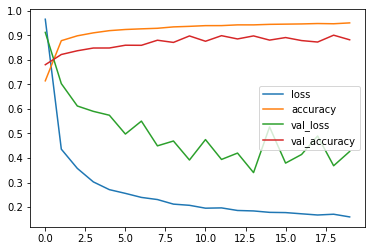

In [243]:
display(pd.DataFrame(model.history.history))
pd.DataFrame(model.history.history).plot()

In [245]:
model.fit_generator(batch2,epochs=20,validation_data=val_batch)

Epoch 1/20


C:\Users\inder\AppData\Local\Temp/ipykernel_28660/1323228799.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(batch2,epochs=20,validation_data=val_batch)


525/525 [==============================] - 21s 40ms/step - loss: 0.2899 - accuracy: 0.9128 - val_loss: 0.2551 - val_accuracy: 0.9208
Epoch 2/20
525/525 [==============================] - 20s 39ms/step - loss: 0.2563 - accuracy: 0.9200 - val_loss: 0.2380 - val_accuracy: 0.9250
Epoch 3/20
525/525 [==============================] - 21s 40ms/step - loss: 0.2469 - accuracy: 0.9246 - val_loss: 0.2326 - val_accuracy: 0.9280
Epoch 4/20
525/525 [==============================] - 21s 39ms/step - loss: 0.2316 - accuracy: 0.9282 - val_loss: 0.2464 - val_accuracy: 0.9237
Epoch 5/20
525/525 [==============================] - 21s 41ms/step - loss: 0.2267 - accuracy: 0.9302 - val_loss: 0.2370 - val_accuracy: 0.9252
Epoch 6/20
525/525 [==============================] - 21s 39ms/step - loss: 0.2289 - accuracy: 0.9283 - val_loss: 0.2154 - val_accuracy: 0.9321
Epoch 7/20
525/525 [==============================] - 21s 40ms/step - loss: 0.2180 - accuracy: 0.9319 - val_loss: 0.2297 - val_accuracy: 0.9285
Epo

,loss,accuracy,val_loss,val_accuracy
0,0.289947,0.912768,0.255149,0.920833
1,0.256281,0.919970,0.238011,0.925000
2,0.246919,0.924583,0.232586,0.927976
3,0.231649,0.928155,0.246382,0.923690
4,0.226666,0.930208,0.236998,0.925238
5,0.228853,0.928304,0.215445,0.932143
6,0.218035,0.931905,0.229727,0.928452
7,0.222996,0.929792,0.217725,0.934405
8,0.224926,0.929881,0.217155,0.930238
9,0.213739,0.933185,0.216541,0.933452


<AxesSubplot:>

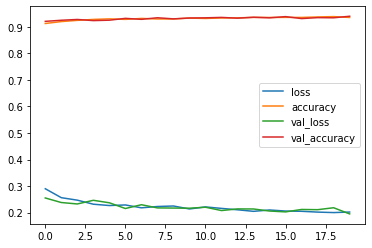

In [246]:
display(pd.DataFrame(model.history.history))
pd.DataFrame(model.history.history).plot()

In [ ]:
model.fit_generator(batch1,epochs=20,validation_data=val_batch)

In [ ]:
display(pd.DataFrame(model.history.history))
pd.DataFrame(model.history.history).plot()

In [ ]:
model.fit_generator(batch2,epochs=20,validation_data=val_batch)

In [ ]:
display(pd.DataFrame(model.history.history))
pd.DataFrame(model.history.history).plot()

In [218]:
ypred = model.predict(xtest)

In [228]:
ypred[7]

array([0.00143207, 0.54280657, 0.01276514, 0.01533968, 0.07414111,
       0.12225553, 0.20572162, 0.01530631, 0.00289301, 0.00733892],
      dtype=float32)

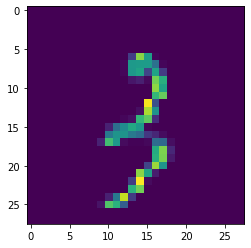

   The Actual Label At Index(6569) 3
    Predicted Value At Index(6569) 1 


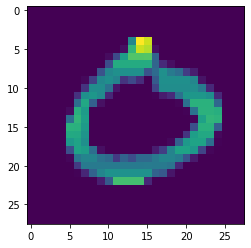

   The Actual Label At Index(9387) 0
    Predicted Value At Index(9387) 1 


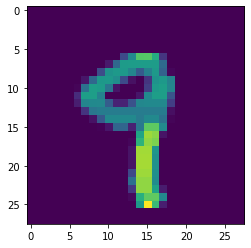

   The Actual Label At Index(598) 9
    Predicted Value At Index(598) 1 


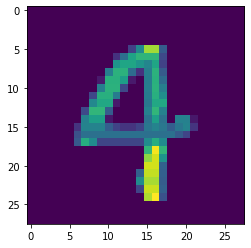

   The Actual Label At Index(5926) 4
    Predicted Value At Index(5926) 1 


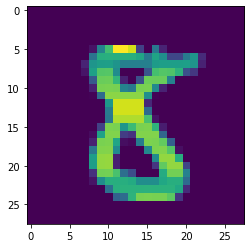

   The Actual Label At Index(4789) 8
    Predicted Value At Index(4789) 1 


In [244]:
for j in range(5):
    i = choice(range(10000))
    plt.imshow(xtest[i])
    plt.show()    
    stmnt=f'''the actual label at index({i}) {ytest[i]}
    predicted value at index({i}) {np.argmax(ypred[i])}'''.title()
    statement(stmnt)

# The first model

In [19]:
test_loss, test_acc = model.evaluate(xtest,ytest)
statement(f'test loss on {len(xtest)} test smaples {test_loss}'.title())
statement(f'validation accuracy on {len(xtest)} test smaples {test_acc*100}'.title())

313/313 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9858
   Test Loss On 10000 Test Smaples 0.06810879707336426 
   Validation Accuracy On 10000 Test Smaples 98.580002784729 


In [20]:
model.save('./Digit Identification/model')

INFO:tensorflow:Assets written to: model\assets


In [122]:
batch_size = 128
num_classes = 10
epochs = 10

(xtrain1, ytrain1), (xtest1, ytest1) = mnist.load_data()
print(xtrain1.shape, ytrain1.shape)

xtrain1 = xtrain1.reshape(xtrain1.shape[0], 28, 28, 1)
xtest1 = xtest1.reshape(xtest1.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

ytrain1 = tf.keras.utils.to_categorical(ytrain1, num_classes)
ytest1 = tf.keras.utils.to_categorical(ytest1, num_classes)
xtrain1 = xtrain1.astype('float32')
xtest1 = xtest1.astype('float32')
xtrain1 /= 255
xtest1 /= 255
print('xtrain1 shape:', xtrain1.shape)
print(xtrain1.shape[0], 'train samples')
print(xtest1.shape[0], 'test samples')

(60000, 28, 28) (60000,)
xtrain1 shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# A model with 2 convolutional layers and 1 dense layer

In [22]:
model1 = Sequential([
(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=xtrain1.shape[1:])),
(Conv2D(64, (3, 3), activation='relu')),
(MaxPooling2D(pool_size=(2, 2))),
(Dropout(0.25)),
(Flatten()),
(Dense(256, activation='relu')),
(Dropout(0.5)),
(Dense(num_classes, activation='softmax')),
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2359552   
                                                      

In [23]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# model.fit(xtrain1,ytrain1,epochs=5,validation_split=.3)
model1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model1.fit(xtrain1, ytrain1,batch_size=batch_size,epochs=20,verbose=1,validation_data=(xtest1, ytest1))

Epoch 1/20
469/469 [==============================] - 39s 82ms/step - loss: 2.2740 - accuracy: 0.1674 - val_loss: 2.2279 - val_accuracy: 0.4276
Epoch 2/20
469/469 [==============================] - 38s 82ms/step - loss: 2.1949 - accuracy: 0.3257 - val_loss: 2.1287 - val_accuracy: 0.6034
Epoch 3/20
469/469 [==============================] - 39s 82ms/step - loss: 2.0868 - accuracy: 0.4547 - val_loss: 1.9823 - val_accuracy: 0.6912
Epoch 4/20
469/469 [==============================] - 39s 82ms/step - loss: 1.9237 - accuracy: 0.5486 - val_loss: 1.7704 - val_accuracy: 0.7372
Epoch 5/20
469/469 [==============================] - 39s 83ms/step - loss: 1.7083 - accuracy: 0.6038 - val_loss: 1.5032 - val_accuracy: 0.7622
Epoch 6/20
469/469 [==============================] - 38s 81ms/step - loss: 1.4644 - accuracy: 0.6484 - val_loss: 1.2289 - val_accuracy: 0.7877
Epoch 7/20
469/469 [==============================] - 38s 80ms/step - loss: 1.2432 - accuracy: 0.6814 - val_loss: 1.0056 - val_accuracy:

In [24]:
display(pd.DataFrame(model.history.history))
pd.DataFrame(model1.history.history).plot

,loss,accuracy,val_loss,val_accuracy
0,2.273957,0.167433,2.227886,0.4276
1,2.194861,0.325750,2.128700,0.6034
2,2.086833,0.454667,1.982253,0.6912
3,1.923714,0.548567,1.770426,0.7372
4,1.708276,0.603767,1.503237,0.7622
5,1.464406,0.648350,1.228917,0.7877
6,1.243248,0.681367,1.005592,0.8055
7,1.074500,0.707500,0.844664,0.8208
8,0.954472,0.730783,0.733101,0.8327
9,0.863376,0.748817,0.653638,0.8443


# Second model

In [25]:
score = model1.evaluate(xtest1, ytest1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3920471668243408
Test accuracy: 0.8928999900817871


In [26]:
model1.save('./Digit Identification/tkinter_model')

INFO:tensorflow:Assets written to: tkinter_model\assets


In [27]:
def predict(file,model,frame_speed=1):
    preds = []
    ext = file.split('.')[-1]
    if ext in 'mp4,ts'.split(','):
        font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
        size = 1.5

        vid = cv2.VideoCapture(file)

        if not vid.isOpened():
            vid = cv2.VideoCapture(0)
        if not vid.isOpened():
            raise IOError('File Not Open')

        text = 'some text in a box!'.title()
        text_width,text_height=cv2.getTextSize(text,font,fontScale=size,thickness=1)[0]


        counter = 0
        while True:
            ret, frame = vid.read()
            counter+=1;
            if (counter%frame_speed)==0:
                try:
                    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                except:
                    break
                resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

                # txt_off_x = 5
                # txt_off_y = gray.shape[0]-25
                # box = ((txt_off_x,txt_off_y), (txt_off_x+text_width+1,txt_off_y-text_height-5))

                img = tf.keras.utils.normalize(resized)
                img = np.array(img).reshape(-1,28,28,1)
                pred = model.predict(img)
                status = np.argmax(pred)
                # print(status)
                # print(type(status))
                preds.append(status)
                x1,y1,w1,h1 = 0,0,175,175
                cv2.rectangle(frame,(x1,x1),(x1+100,y1+100),(0,0,0),-1)
                cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,.7,(0,0,255),2)

                cv2.imshow('handwritten digits recognition',frame)

                if cv2.waitKey(2)&0xFF==ord('q'):
                    break
        vid.release()
        cv2.destroyAllWindows()
        return preds
    
    elif ext in 'png,jpeg'.split(','):
        img = cv2.imread(file)
        plt.imshow(img)
        plt.show()
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.show()
        img = cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
        plt.imshow(img)
        plt.show()
        img = tf.keras.utils.normalize(img)
        img = np.array(img).reshape(-1,28,28,1)
        pred = model.predict(img)
        print('the model identified the digit in the image as'.title(),end='')
        statement(np.argmax(pred))

# A small demonsteration

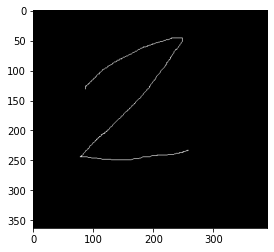

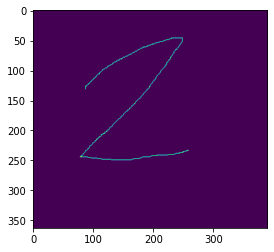

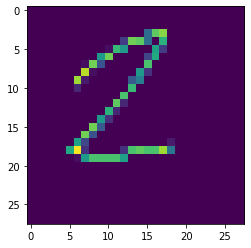

The Model Identified The Digit In The Image As   2 


In [35]:
predict('./myImage/2.png',model,frame_speed=1)

In [37]:
li = predict('./myImage/2022-02-02-18-10-28.mp4',model)
li

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 7,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 7,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 7,
 7,
 7,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 7,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
